In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("BTC_1sec.csv")
df

,Unnamed: 0,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
0,0,2021-04-07 11:32:42.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2021-04-07 11:32:43.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-04-07 11:32:44.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-04-07 11:32:45.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-04-07 11:32:46.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,7891,2021-04-07 13:44:13.122161+00:00,56779.145,0.01,433.215830,603.562258,-8.806050e-08,-2.641815e-07,-0.000116,-0.000222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7892,7892,2021-04-07 13:44:14.122161+00:00,56779.145,0.01,24649.470500,0.000000,-8.806050e-08,-2.641815e-07,-0.000116,-0.000194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7893,7893,2021-04-07 13:44:15.122161+00:00,56779.145,0.01,470.983617,0.000000,-8.806050e-08,-2.641815e-07,-0.000237,-0.000246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7894,7894,2021-04-07 13:44:16.122161+00:00,56769.255,11.23,0.000000,36917.692213,-9.890917e-05,-1.024322e-04,-0.000105,-0.000173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

df["eps"] = np.sign(df["buys"] - df["sells"])


In [ ]:
import numpy as np

def sign_autocorrelation(eps, max_lag):
    autocorr = []
    eps = eps.dropna().values
    for lag in range(1, max_lag + 1):
        corr = np.mean(eps[:-lag] * eps[lag:])
        autocorr.append(corr)
    return autocorr
acf_values=sign_autocorrelation(df['eps'], max_lag=360)


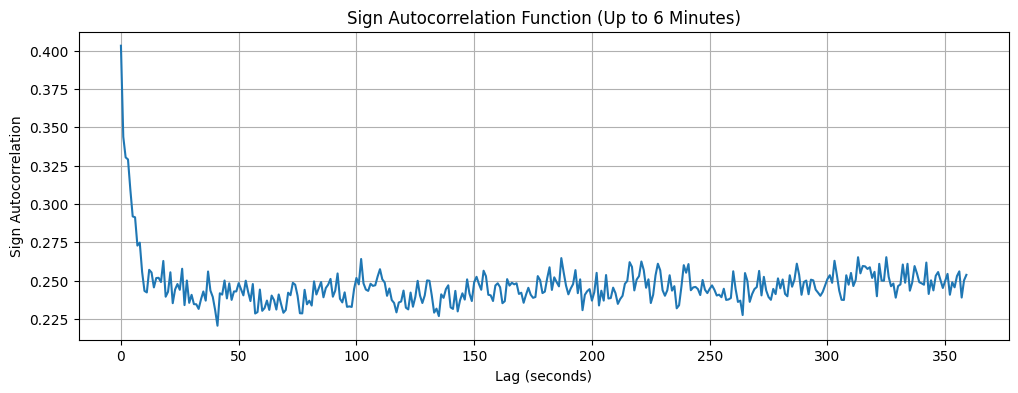

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(acf_values)
plt.xlabel("Lag (seconds)")
plt.ylabel("Sign Autocorrelation")
plt.title("Sign Autocorrelation Function (Up to 6 Minutes)")
plt.grid(True)
plt.show()


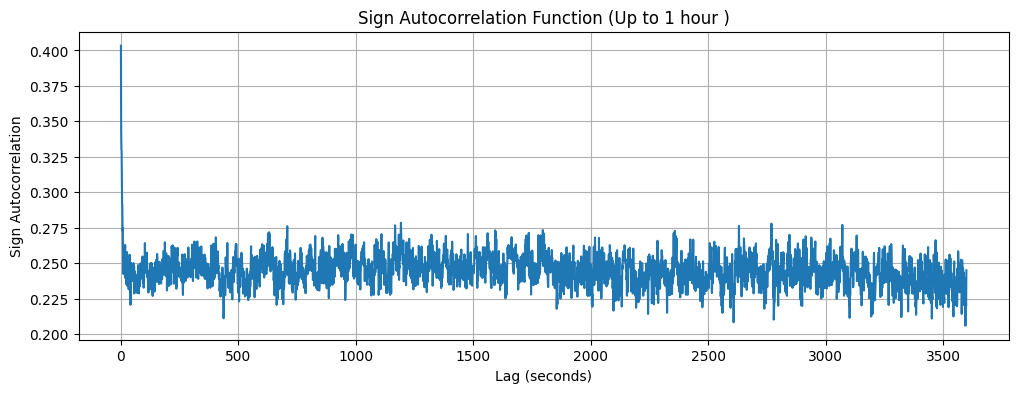

In [ ]:
def sign_autocorrelation(eps, max_lag):
    autocorr = []
    eps = eps.dropna().values
    for lag in range(1, max_lag + 1):
        corr = np.mean(eps[:-lag] * eps[lag:])
        autocorr.append(corr)
    return autocorr
acf_values=sign_autocorrelation(df['eps'], max_lag=3600)


plt.figure(figsize=(12, 4))
plt.plot(acf_values)
plt.xlabel("Lag (seconds)")
plt.ylabel("Sign Autocorrelation")
plt.title("Sign Autocorrelation Function (Up to 1 hour )")
plt.grid(True)
plt.show()


In [ ]:
pip install nolds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
import nolds
hurst = nolds.hurst_rs(df['eps'].values)
print(f"Hurst exponent: {hurst:.4f}")


Hurst exponent: 0.6295


In [ ]:
from scipy.optimize import curve_fit
import numpy as np

def power_law(k, a, alpha):
    return a * k ** (-alpha)

lags = np.arange(1, len(acf_values) + 1)
acf = np.array(acf_values)
popt, _ = curve_fit(power_law, lags[:2000], acf[:2000], p0=(1, 0.1))
a_fit, alpha_fit = popt

print(f"Fitted power-law: ρ(k) ≈ {a_fit:.4f} * k^(-{alpha_fit:.4f})")


Fitted power-law: ρ(k) ≈ 0.2494 * k^(-0.0016)


In [ ]:
df['market_order_volume'] = df['buys'] + df['sells']  # or however you estimate it
df['side'] = np.where(df['buys'] > 0, 'buy', 'sell')

df['pi'] = 0
buy_aggressive = (df['side'] == 'buy') & (df['buys'] >= df['asks_notional_0'])
sell_aggressive = (df['side'] == 'sell') & (df['sells'] >= df['bids_notional_0'])
df.loc[buy_aggressive | sell_aggressive, 'pi'] = 1


In [ ]:
def conditional_sign_correlation(df, max_lag=100):
    eps = df['eps'].values
    pi = df['pi'].values
    results = {('MO0', 'MO0'): [], ('MO0', 'MO1'): [], ('MO1', 'MO0'): [], ('MO1', 'MO1'): []}

    for lag in range(1, max_lag + 1):
        for pi1 in [0, 1]:
            for pi2 in [0, 1]:
                valid_idx = (df.index[:-lag])[ (pi[:-lag] == pi1) & (pi[lag:] == pi2) ]
                num = np.mean(eps[:-lag][valid_idx] * eps[lag:][valid_idx])
                p1 = np.mean(pi == pi1)
                p2 = np.mean(pi == pi2)
                denom = p1 * p2 if p1 > 0 and p2 > 0 else np.nan
                c_val = num / denom if denom else np.nan
                results[(f'MO{pi1}', f'MO{pi2}')].append(c_val)

    return results


In [ ]:
import numpy as np
import pandas as pd


df['buy_volume'] = df[[f'bids_market_notional_{i}' for i in range(15)]].sum(axis=1)
df['sell_volume'] = df[[f'asks_market_notional_{i}' for i in range(15)]].sum(axis=1)
df['best_ask_volume'] = df['asks_notional_0']
df['best_bid_volume'] = df['bids_notional_0']
df['side'] = np.where(df['buy_volume'] > df['sell_volume'], 'buy', 'sell')
df['mo_volume'] = np.where(df['side'] == 'buy', df['buy_volume'], df['sell_volume'])
df['opposite_quote'] = np.where(df['side'] == 'buy', df['best_ask_volume'], df['best_bid_volume'])
df['pi'] = (df['mo_volume'] >= df['opposite_quote']).astype(int)

lags = np.arange(1, 3601)
results = {'C11': [], 'C10': [], 'C01': [], 'C00': []}

for lag in lags:
    for pi1, pi2, key in [(1, 1, 'C11'), (1, 0, 'C10'), (0, 1, 'C01'), (0, 0, 'C00')]:
        mask = (df['pi'][:-lag].values == pi1) & (df['pi'][lag:].values == pi2)
        if np.any(mask):
            e1 = df['eps'][:-lag].values[mask]
            e2 = df['eps'][lag:].values[mask]
            results[key].append(np.mean(e1 * e2))
        else:
            results[key].append(np.nan)

C = pd.DataFrame(results, index=lags)


In [ ]:
C

,C11,C10,C01,C00
1,0.468707,0.294545,0.233636,0.455386
2,0.494737,0.253033,0.231369,0.371063
3,0.414330,0.256585,0.242991,0.358178
4,0.457286,0.262899,0.257774,0.347898
5,0.404110,0.233387,0.221053,0.339810
...,...,...,...,...
3596,0.295154,0.216842,0.171617,0.201828
3597,0.231441,0.270327,0.132670,0.225794
3598,0.179487,0.284501,0.204013,0.208399
3599,0.308017,0.232162,0.146465,0.224377


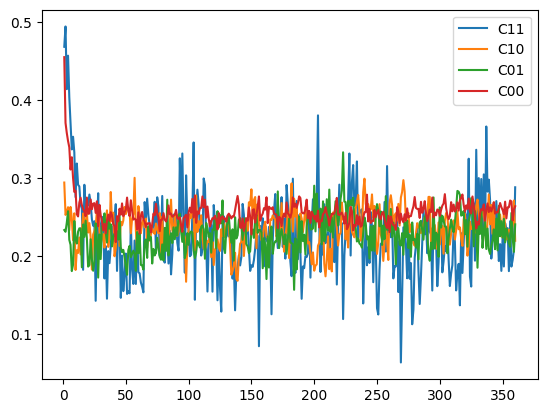

In [ ]:
plt.plot(C['C11'][:360], label = 'C11')
plt.plot(C['C10'][:360], label = 'C10')
plt.plot(C['C01'][:360], label = 'C01')
plt.plot(C['C00'][:360], label = 'C00')
plt.legend()


In [ ]:
eps = df['eps'].values
cumulative_sum = np.cumsum(eps)
indices = np.arange(1, len(eps)+1)

df['osi'] = cumulative_sum / indices

In [ ]:
df

,Unnamed: 0,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,...,market_order_volume,side,pi,buy_volume,sell_volume,best_ask_volume,best_bid_volume,mo_volume,opposite_quote,osi
0,0,2021-04-07 11:32:42.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.000000,sell,0,0.000000,0.000000,1902.290039,3061.860107,0.000000,3061.860107,0.000000
1,1,2021-04-07 11:32:43.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.000000,sell,0,0.000000,0.000000,1902.290039,3061.860107,0.000000,3061.860107,0.000000
2,2,2021-04-07 11:32:44.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.000000,sell,0,0.000000,0.000000,1902.290039,3061.860107,0.000000,3061.860107,0.000000
3,3,2021-04-07 11:32:45.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.000000,sell,0,0.000000,0.000000,1902.290039,3061.860107,0.000000,3061.860107,0.000000
4,4,2021-04-07 11:32:46.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,...,0.000000,sell,0,0.000000,0.000000,1902.290039,3061.860107,0.000000,3061.860107,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,7891,2021-04-07 13:44:13.122161+00:00,56779.145,0.01,433.215830,603.562258,-8.806050e-08,-2.641815e-07,-0.000116,-0.000222,...,1036.778088,buy,0,603.559998,433.220001,194928.015625,2881.540039,603.559998,194928.015625,0.486442
7892,7892,2021-04-07 13:44:14.122161+00:00,56779.145,0.01,24649.470500,0.000000,-8.806050e-08,-2.641815e-07,-0.000116,-0.000194,...,24649.470500,sell,1,0.000000,24649.470703,44603.800781,1429.130005,24649.470703,1429.130005,0.486507
7893,7893,2021-04-07 13:44:15.122161+00:00,56779.145,0.01,470.983617,0.000000,-8.806050e-08,-2.641815e-07,-0.000237,-0.000246,...,470.983617,sell,0,0.000000,470.980011,274111.187500,1429.130005,470.980011,1429.130005,0.486572
7894,7894,2021-04-07 13:44:16.122161+00:00,56769.255,11.23,0.000000,36917.692213,-9.890917e-05,-1.024322e-04,-0.000105,-0.000173,...,36917.692213,buy,0,1144.630005,0.000000,1452.300049,1452.010010,1144.630005,1452.300049,0.486384


In [ ]:
df['sign'] = df['side'].map({'buy': 1, 'sell': -1})
sign_series = df['sign'].dropna().values

In [ ]:
def generate_dar_signs(T, K, p, seed=None):

    np.random.seed(seed)
    max_lag = len(K)
    signs = np.random.choice([-1, 1], size=max_lag).tolist()  # Initialize history

    for t in range(T):
        # Sample lag ℓ
        lag = np.random.choice(np.arange(1, max_lag+1), p=K)
        past_sign = signs[-lag]
        new_sign = past_sign if np.random.rand() < p else -past_sign
        signs.append(new_sign)

    return np.array(signs[max_lag:])


In [ ]:
sign_series

array([-1, -1, -1, ..., -1,  1,  1])

In [ ]:
from statsmodels.tsa.stattools import acf


max_lag = 3600
empirical_corr = acf(sign_series, nlags=max_lag, fft=True)


In [ ]:
def power_law_K(gamma, max_lag):
    lags = np.arange(1, max_lag+1)
    weights = lags ** (-gamma)
    return weights / weights.sum()

In [ ]:
def generate_dar_signs(T, K, p, seed=None):
    np.random.seed(seed)
    max_lag = len(K)
    signs = np.random.choice([-1, 1], size=max_lag).tolist()  # initial history

    for _ in range(T):
        lag = np.random.choice(np.arange(1, max_lag+1), p=K)
        past_sign = signs[-lag]
        new_sign = past_sign if np.random.rand() < p else -past_sign
        signs.append(new_sign)

    return np.array(signs[max_lag:])


In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def fit_dar_model(empirical_corr, max_lag, gamma_range, p_range):
    best_score = np.inf
    best_params = None
    best_sim_corr = None

    for gamma in gamma_range:
        K = power_law_K(gamma, max_lag)
        for p in p_range:
            synthetic = generate_dar_signs(10000, K, p, seed=42)
            sim_corr = acf(synthetic, nlags=max_lag, fft=True)
            score = mean_squared_error(empirical_corr[1:], sim_corr[1:])  # skip lag 0
            if score < best_score:
                best_score = score
                best_params = (gamma, p)
                best_sim_corr = sim_corr

    return best_params, best_sim_corr


In [ ]:
gamma_range = np.linspace(1.2, 2.0, 10)   # power-law tail exponents
p_range = np.linspace(0.5, 0.99, 10)      # herding strength

best_params, best_sim_corr = fit_dar_model(empirical_corr, max_lag, gamma_range, p_range)
gamma_opt, p_opt = best_params
print(f"Best gamma: {gamma_opt:.2f}, Best p: {p_opt:.2f}")


Best gamma: 1.20, Best p: 0.77


In [ ]:
df = df[:2000]

/tmp/ipython-input-30-2738277585.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign'] = df['side'].map({'buy': 1, 'sell': -1})
/tmp/ipython-input-30-2738277585.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_return'] = np.log(df['midpoint']).diff()
/tmp/ipython-input-30-2738277585.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

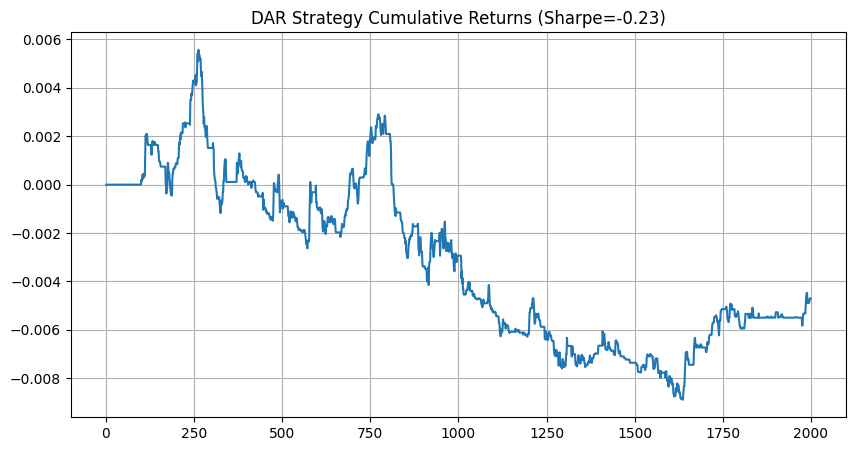

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df['sign'] = df['side'].map({'buy': 1, 'sell': -1})
sign_series = df['sign'].dropna().values
max_lag = 100
empirical_corr = acf(sign_series, nlags=max_lag, fft=True)

def power_law_K(gamma, max_lag):
    lags = np.arange(1, max_lag+1)
    weights = lags ** (-gamma)
    return weights / weights.sum()

def generate_dar_signs(T, K, p, seed=None):
    np.random.seed(seed)
    max_lag = len(K)
    signs = np.random.choice([-1, 1], size=max_lag).tolist()
    for _ in range(T):
        lag = np.random.choice(np.arange(1, max_lag+1), p=K)
        past_sign = signs[-lag]
        new_sign = past_sign if np.random.rand() < p else -past_sign
        signs.append(new_sign)
    return np.array(signs[max_lag:])

def fit_dar_model(empirical_corr, max_lag, gamma_range, p_range):
    best_score = np.inf
    best_params = None
    best_sim_corr = None
    for gamma in gamma_range:
        K = power_law_K(gamma, max_lag)
        for p in p_range:
            synthetic = generate_dar_signs(10000, K, p, seed=42)
            sim_corr = acf(synthetic, nlags=max_lag, fft=True)
            score = mean_squared_error(empirical_corr[1:], sim_corr[1:])
            if score < best_score:
                best_score = score
                best_params = (gamma, p)
                best_sim_corr = sim_corr
    return best_params, best_sim_corr

gamma_range = np.linspace(1.2, 2.0, 10)
p_range = np.linspace(0.5, 0.99, 10)
best_params, best_sim_corr = fit_dar_model(empirical_corr, max_lag, gamma_range, p_range)
gamma_opt, p_opt = best_params
K_opt = power_law_K(gamma_opt, max_lag)

df['log_return'] = np.log(df['midpoint']).diff()
df['predicted_sign'] = 0

for t in range(max_lag, len(df)):
    past_signs = df['sign'].iloc[t - np.arange(1, max_lag + 1)].values
    pred = (2 * p_opt - 1) * np.dot(K_opt, past_signs)
    df.at[df.index[t], 'predicted_sign'] = np.sign(pred)

df['strategy_return'] = df['predicted_sign'].shift() * df['log_return']
df.dropna(subset=['strategy_return'], inplace=True)

sharpe = df['strategy_return'].mean() / df['strategy_return'].std() * np.sqrt(252)
cumulative = df['strategy_return'].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(cumulative)
plt.title(f'DAR Strategy Cumulative Returns (Sharpe={sharpe:.2f})')
plt.grid()
plt.show()
